# Упражнение 2.2

Давайте создадим класс SawtoothSignal, который расширяет signal и предоставляет метод evaluate для оценки пилообразного сигнала. Параметр Cycles обозначает количество циклов с момента старта, а frac - дробная часть, увеличивающаяся от 0 до 1 в течение каждого периода. Функция np.modf разбивает каждое значение цикла на целую и дробную части. Здесь используется только дробная часть, которая сохраняется в frac. Это делается для получения фазы сигнала в каждой временной точке. Метод normalize нормализует и смещает фазы сигнала для получения конечных значений сигнала.

In [ ]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

--2024-05-23 18:23:31--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py [following]
--2024-05-23 18:23:32--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48574 (47K) [text/plain]
Saving to: ‘thinkdsp.py’

thinkdsp.py         100%[===================>]  47.44K  --.-KB/s    in 0.008s  

2024-05-23 18:23:32 (5.52 MB/s) - ‘thinkdsp.py’ saved [48574/48574]



In [ ]:
from thinkdsp import Sinusoid
from thinkdsp import normalize, unbias
import numpy as np

class SawtoothSignal(Sinusoid):
    """Represents a sawtooth signal."""

    def evaluate(self, ts):
        """Evaluates the signal at the given times.

        ts: float array of times

        returns: float wave array
        """
        ts = np.asarray(ts)
        cycles = self.freq * ts + self.offset / np.pi / 2
        frac, _ = np.modf(cycles)
        ys = normalize(unbias(frac), self.amp)
        return ys

Затем мы построим график данного сигнала.

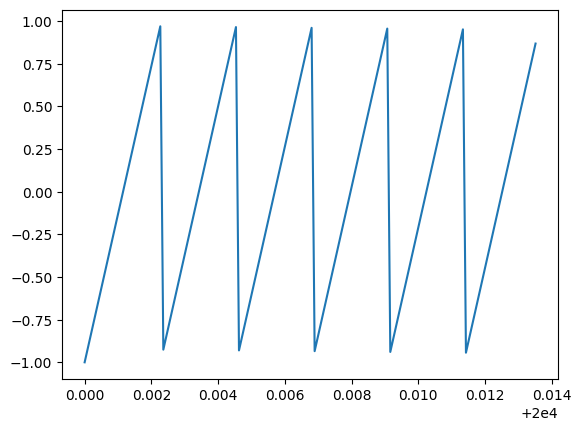

In [ ]:
signal = SawtoothSignal()
duration = signal.period*6
segment = signal.make_wave(duration, 20000)
segment.plot()

Давайте построим спектрограмму данного сигнала.

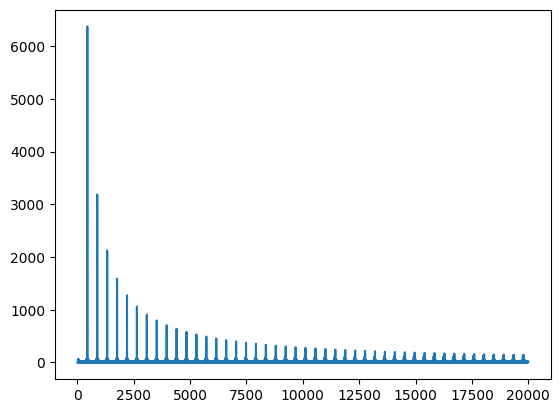

In [ ]:
spec = SawtoothSignal().make_wave(duration=0.5,framerate=40000).make_spectrum()
spec.plot()

Для сравнения пилообразного сигнала с треугольным и прямоугольным построим их сигналы и спектры.

Начнем с треугольного сигнала:

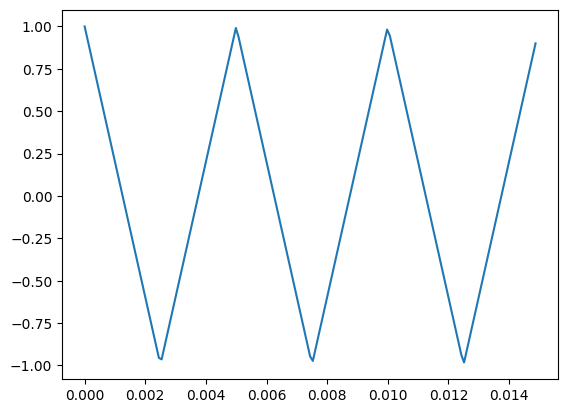

In [ ]:
from thinkdsp import TriangleSignal
tri_signal = TriangleSignal(200)
tri_signal.plot()

Его спектр:

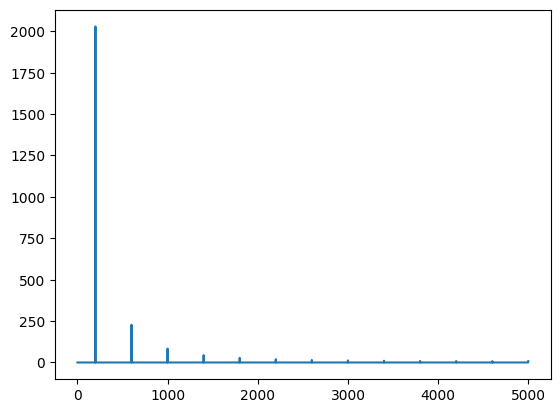

In [ ]:
tri_wave = tri_signal.make_wave(duration=0.5, framerate=10000)
tri_spectrum = tri_wave.make_spectrum()
tri_spectrum.plot()

Прямоугоньный сигнал:

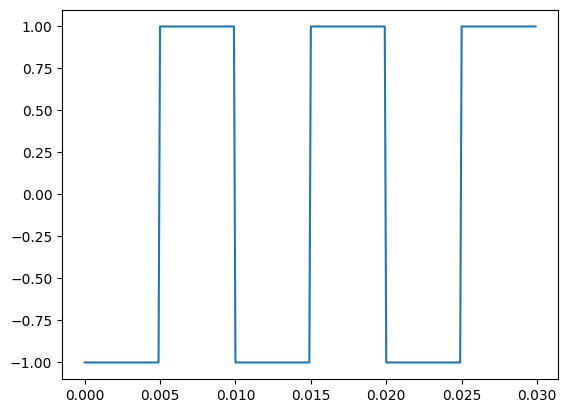

In [ ]:
from thinkdsp import SquareSignal

squ_signal = SquareSignal(100)
duration = squ_signal.period*3
segment = squ_signal.make_wave(duration, framerate=10000)
segment.plot()

Его спектр:

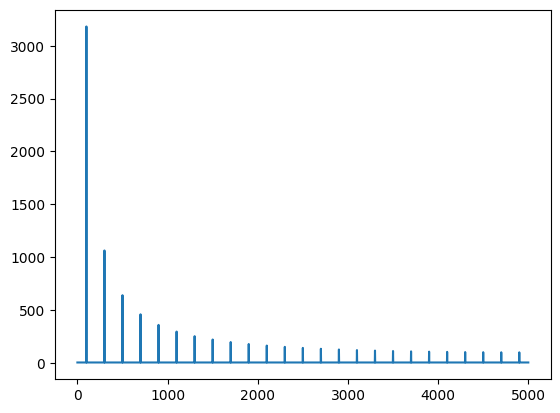

In [ ]:
wave = squ_signal.make_wave(duration=0.5, framerate=10000)
spectrum = wave.make_spectrum()
spectrum.plot()

Пилообразный, треугольный и прямоугольный сигналы обладают различными спектрами:

Пилообразный сигнал: содержит гармоники с амплитудами, пропорциональными 1/f. Треугольный сигнал: включает в себя нечетные гармоники с амплитудами, пропорциональными 1/f^2. Прямоугольный сигнал: состоит из нечетных гармоник с постоянными амплитудами.

Это означает, что у пилообразного сигнала уровень высокочастотных гармоник выше, у треугольного сигнала он ниже, а у прямоугольного сигнала присутствуют только нечетные гармоники с постоянной амплитудой.

# Упражнение 2.3

Давайте сгенерируем прямоугольный сигнал с частотой 1100 Гц и вычислим волну с выборками 10000 кадров в секунду.

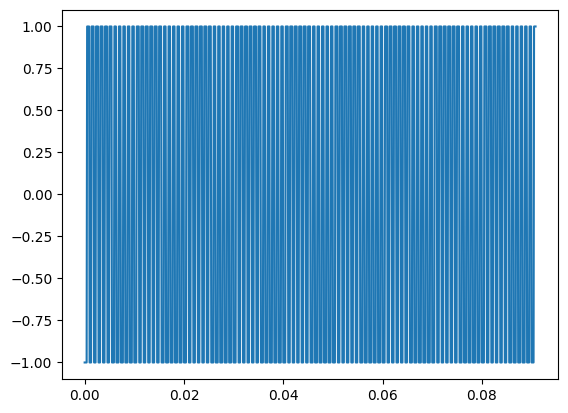

In [ ]:
from thinkdsp import SquareSignal
signal = SquareSignal(1100)
duration = signal.period * 100
segment = signal.make_wave(duration, framerate = 10000)
segment.plot()

Прослушаем:

In [ ]:
wave = signal.make_wave(duration = 2, framerate = 10000)
wave.apodize()
wave.make_audio()

Построим спектор:

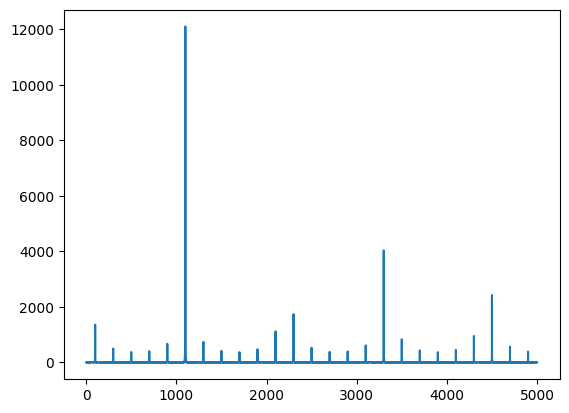

In [ ]:
spectrum = wave.make_spectrum()
spectrum.plot()

Во время прослушивания слышится биение из-за того, что большинство гармоник были завернуты.

# Упражнение 2.4

Давайте возьмем объект спектра (Spectrum) и выведем на печать несколько первых значений spectrum.fs.

In [ ]:
spectrum.fs[:5]

array([0. , 0.5, 1. , 1.5, 2. ])

Мы убедились, что первое значение spectrum.fs равно 0.

Теперь создадим треугольный сигнал с частотой 440 Гц и волну продолжительностью 0,01 секунды. Затем распечатаем этот сигнал.

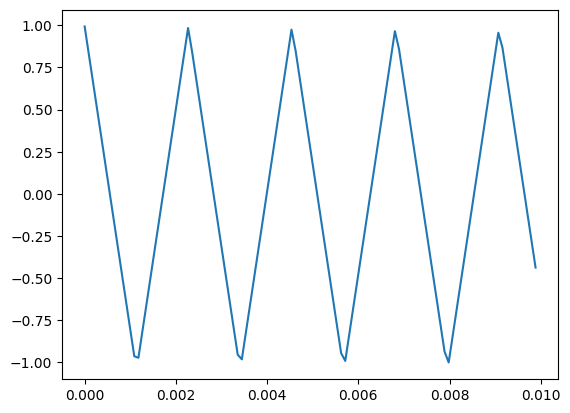

In [ ]:
triangle = TriangleSignal(440).make_wave(duration = 0.01)
triangle.plot()

Создадим объект Spectrum и распечатаем Spectrum.hs[0]

In [ ]:
spectrum = triangle.make_spectrum()
spectrum.hs[0]

(1.0436096431476471e-14+0j)

В массиве hs объекта Spectrum каждый элемент представлен комплексным числом, которое описывает частотную составляющую сигнала. Модуль комплексного числа пропорционален амплитуде соответствующей частотной составляющей, а аргумент (угол) определяет фазу. Первый элемент массива hs является комплексным числом с нулевой мнимой частью и очень маленькой действительной частью, близкой к нулю. Это соответствует постоянной компоненте сигнала.

Давайте установим Spectrum.hs[0] равным 100.

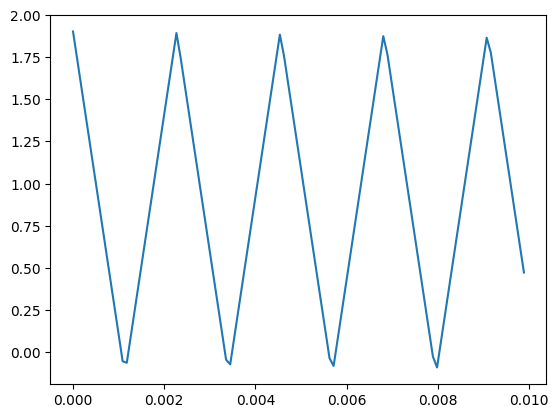

In [ ]:
spectrum.hs[0] = 100
spectrum.make_wave().plot()

После увеличения Spectrum.hs[0] на 100 видим, что высота графика увеличилась.

# Упражнение 2.5

Давайте создадим функцию, которая принимает объект Spectrum в качестве параметра и изменяет его, разделяя каждый элемент hs на соответствующую частоту из fs.

In [ ]:
def filter_spectrum(spectrum):
    """Divides the spectrum through by the fs.

    spectrum: Spectrum object
    """
    # avoid division by 0
    spectrum.hs[1:] /= spectrum.fs[1:]
    spectrum.hs[0] = 0

Давайте протестируем эту функцию на прямоугольном сигнале. Сначала мы послушаем прямоугольный сигнал до применения нашей функции.

In [ ]:
wave = SquareSignal(440).make_wave(duration = 1)
wave.make_audio()

Далее построим спектр. ( До применения функции )

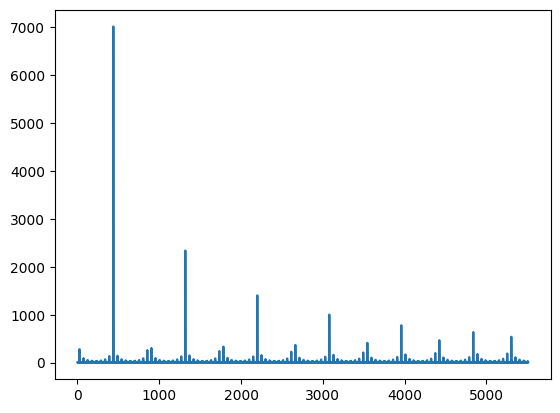

In [ ]:
spec = wave.make_spectrum()
spec.plot()

Применим функцию и ппосмотрим на изменения.

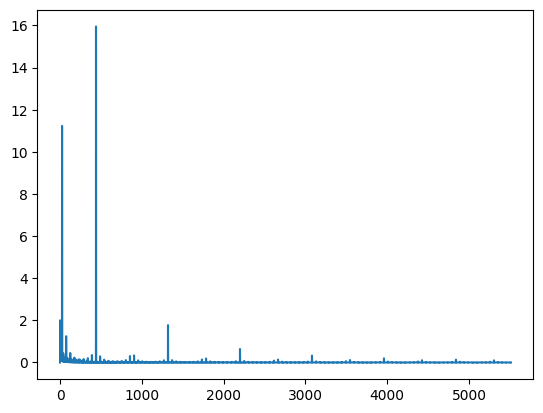

In [ ]:
filter_spectrum(spec)
spec.plot()
spec.make_wave().make_audio()

Эта функция выполняет роль низкочастотного фильтра, который пропускает низкочастотные компоненты сигнала и ослабляет высокочастотные. В результате второй звук звучит более "чисто" и "приглушенно", так как высокочастотные шумы и искажения удалены. Такой фильтр может быть полезен для уменьшения шума в аудиосигнале или для создания специальных эффектов, таких как "мягкий" или "теплый" звук.

# Упражнение 2.6

Найдём сигнал, состоящий из чётных и нечётных гармоник, спадающих пропорционально 1/f^2. Для этого создадим пилообразный сигнал и применим к нему функцию, написанную в прошлом упражении.

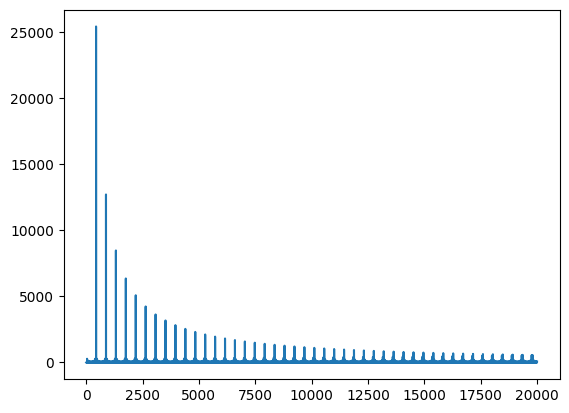

In [ ]:
saw = SawtoothSignal(440)
saw_wave = saw.make_wave(duration=2, framerate=40000)
saw_spec =  saw_wave.make_spectrum()
saw_spec.plot()

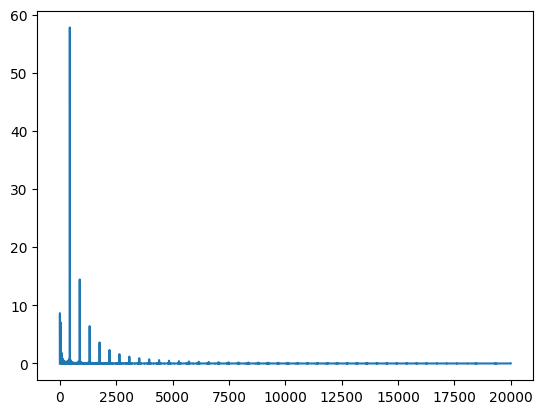

In [ ]:
filter_spectrum(saw_spec)
saw_spec.plot()